In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, mean_squared_error,mean_absolute_error, r2_score, roc_curve,auc
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Part 1: Linear Regression (Simple Dataset)

In [3]:
#2 load Dataset
dataset="Experience-Salary.csv"
data=pd.read_csv(dataset)
data.head()

,exp(in months),salary(in thousands)
0,18.290293,16.521825
1,17.023407,11.666234
2,26.343613,23.167255
3,19.105834,20.877145
4,27.742516,23.166236


In [4]:
#3 Dataset Information
print("DATASET DESCRIPTION")
print(data.describe()) 
print("--------------")
print("DATASET INFORMATION")
print(data.info())

DATASET DESCRIPTION
       exp(in months)  salary(in thousands)
count     1000.000000           1000.000000
mean        26.157825             26.722597
std          8.717091              8.844761
min          0.697594             -1.276342
25%         20.073600             20.531008
50%         25.875225             26.745576
75%         32.406986             32.615753
max         49.463222             55.297016
--------------
DATASET INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   exp(in months)        1000 non-null   float64
 1   salary(in thousands)  1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB
None


In [5]:
#5 Correlation Coefficient Matrix
c_r=data.corr()
print(c_r)


                      exp(in months)  salary(in thousands)
exp(in months)              1.000000              0.810969
salary(in thousands)        0.810969              1.000000


In [6]:
#6 Normalize Dataset
min_max_scaler=MinMaxScaler()
normalize_data=pd.DataFrame(min_max_scaler.fit_transform(data), columns=data.columns)
normalize_data.head()

,exp(in months),salary(in thousands)
0,0.360760,0.314603
1,0.334781,0.228775
2,0.525904,0.432069
3,0.377484,0.391589
4,0.554590,0.432051


In [7]:
#8 Split Dataset
features=normalize_data.drop(columns=["salary(in thousands)"])
target=normalize_data["salary(in thousands)"]

#Partition the data into 80(training)/20(testing)
features_train, features_test, target_train, target_test=train_test_split(features,target,test_size=0.2,random_state=42)
print(features_train.describe())
print(features_test.describe())

       exp(in months)
count      800.000000
mean         0.519511
std          0.178956
min          0.000000
25%          0.397563
50%          0.513997
75%          0.646355
max          1.000000
       exp(in months)
count      200.000000
mean         0.532424
std          0.178019
min          0.058856
25%          0.396514
50%          0.534583
75%          0.662445
max          0.987470


In [8]:
print(target_train.describe())
print(target_test.describe())

count    800.000000
mean       0.492951
std        0.157602
min        0.000000
25%        0.384239
50%        0.492830
75%        0.598110
max        0.956908
Name: salary(in thousands), dtype: float64
count    200.000000
mean       0.502764
std        0.151324
min        0.138213
25%        0.407116
50%        0.506893
75%        0.599405
max        1.000000
Name: salary(in thousands), dtype: float64


In [9]:
#4 and #7 Train the model using linear regression
#Creating Variable
model=LinearRegression()
model.fit(features_train,target_train)

LinearRegression()

In [10]:
#10 Predict the output for test data
target_prediction=model.predict(features_test)
print(target_prediction)

[0.65277314 0.38082101 0.7726222  0.60715167 0.34379109 0.45686597
 0.48353902 0.46354897 0.8292083  0.46418921 0.25838775 0.47854948
 0.53647064 0.47300126 0.55593867 0.58568788 0.46676705 0.3537684
 0.55119909 0.24259599 0.35837265 0.57463592 0.50475238 0.46144838
 0.66001964 0.55414406 0.27622816 0.4770559  0.51473935 0.72904211
 0.31949229 0.3369562  0.57660633 0.6553091  0.57758526 0.60321006
 0.39151332 0.63087917 0.49219137 0.61933444 0.51164774 0.43747079
 0.57111223 0.57049747 0.31651027 0.4682452  0.4520286  0.48709344
 0.35889402 0.65870707 0.38570029 0.53045958 0.64394644 0.40301657
 0.40483297 0.5767425  0.36805025 0.72107724 0.409658   0.33710949
 0.41166303 0.53124535 0.63176403 0.34061339 0.3981654  0.64685698
 0.7917461  0.68343347 0.65179132 0.65094267 0.53331975 0.58090744
 0.33758213 0.35204382 0.7430893  0.51505482 0.59094039 0.32150874
 0.36149453 0.62888243 0.6462852  0.54167482 0.29403735 0.56918791
 0.57566743 0.61355056 0.48101941 0.68483424 0.4321447  0.54822

In [11]:
# #9 Confusion Matrix
# #Not Working with regression model
# c_m=confusion_matrix(np.array(target_test),np.array(target_prediction))

In [12]:
#11 Evaluating the Model
#Squared Error
mse=mean_squared_error(target_test,target_prediction)
print("mean squared error: ",mse)

#Absolute Error
mae=mean_absolute_error(target_test,target_prediction)
print("mean absolute error: ",mae)

#R2 Score
r2=r2_score(target_test,target_prediction)
print("r2score: ",r2)

mean squared error:  0.008639237826409428
mean absolute error:  0.07357059410704046
r2score:  0.6208258933084712


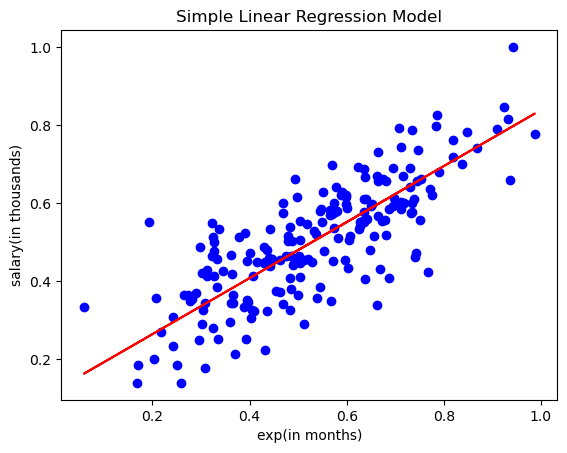

In [13]:
#12 Graphs
#Generating Scatter Plot
plt.scatter(features_test,target_test,color="blue",label="Actual Data")
plt.plot(features_test,target_prediction,color="red",label="Predicted Data")
plt.xlabel("exp(in months)")
plt.ylabel("salary(in thousands)")
plt.title("Simple Linear Regression Model")
plt.show()

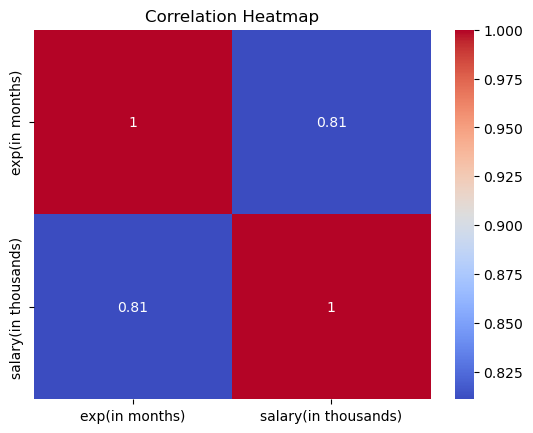

In [14]:
#Graph Correlation Heatmap
plt.figure()
sns.heatmap(c_r,annot=True,cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


521   -0.182595
737    0.037182
740    0.016304
660   -0.049900
411    0.067981
         ...   
408   -0.111380
332    0.088083
208    0.051934
613   -0.059436
78    -0.090377
Name: salary(in thousands), Length: 200, dtype: float64


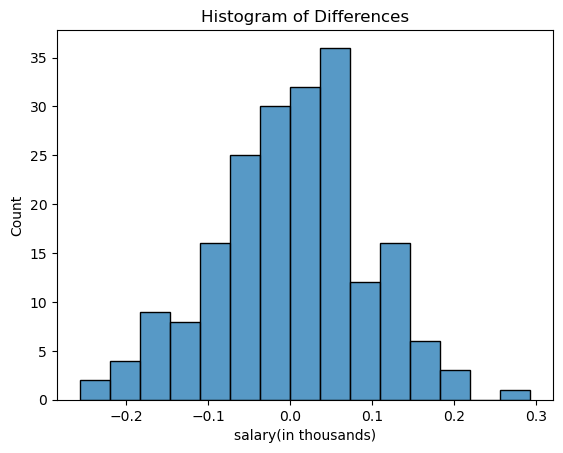

In [15]:
#Graph Histogram
diff=target_test-target_prediction
print(diff)

plt.figure()
sns.histplot(diff)
plt.title("Histogram of Differences")
plt.show()

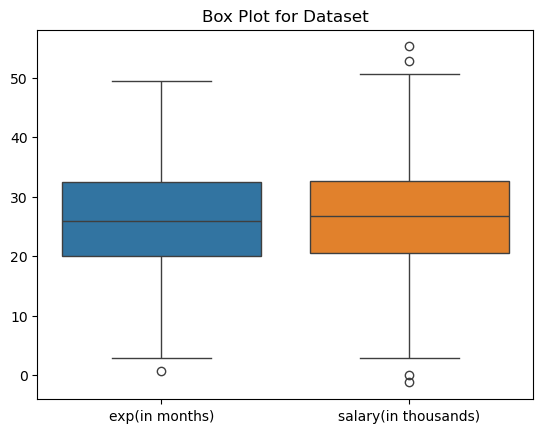

In [16]:
#Graph Box Plot for Dataset
plt.figure()
sns.boxplot(data)
plt.title("Box Plot for Dataset")
plt.show()
